1. **[Association Rule Generation from Transaction Data]**
-  **Download transaction dataset to your local drive.**
   - Go to the following Google Drive link (Students must be logged in to their Rowan accounts):
   [Google Drive Link](https://drive.google.com/drive/folders/1LuFEbgq3IvisEXT1jOZ-H4jWeqzqEH3m?usp=sharing)
-  **Download the ’Grocery Items {DATASET NUMBER}.csv’ file from the Google Drive Link.**
   - `DATASET NUMBER` is the number assigned to you earlier in the semester.
-  **Using minimum support = 0.01 and minimum confidence threshold = 0.1, what are the association rules you can extract from your dataset?** (0.5 point)
   - (Refer to [mlxtend documentation](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/) for guidance).
-  **Use minimum support values (msv): 0.001, 0.005, 0.01 and minimum confidence threshold (mct): 0.05, 0.075, 0.1. For each pair (msv, mct), find the number of association rules extracted from the dataset.**
   - Construct a heatmap using Seaborn data visualization library ([Seaborn Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)) to show the count results such that the x-axis is msv and the y-axis is mct. (2.5 points)
-  **Split the dataset into 50:50 (i.e., 2 equal subsets) and extract association rules for each data subset for minimum support = 0.005 and minimum confident threshold = 0.075.**
   - Show the association rules for both sets. Which association rules appeared in both sets (note that there could be none)? (1 point)


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
def load_dataset(file_path):
    return pd.read_csv(file_path, header=None)

In [31]:
def prepare_transactions(dataset):
    transactions = []
    for index, row in dataset.iterrows():
        transaction = [str(item) for item in row if pd.notnull(item)]
        transactions.append(transaction)
    return transactions

In [32]:
def encode_transactions(transactions):
    encoder = TransactionEncoder()
    encoded_array = encoder.fit(transactions).transform(transactions)
    return pd.DataFrame(encoded_array, columns=encoder.columns_)

In [38]:
def find_frequent_itemsets(data_frame, min_support=0.01):
    return apriori(data_frame, min_support=min_support, use_colnames=True)


def generate_association_rules(itemsets, min_confidence=0.1):
    rules = association_rules(
        itemsets, metric="confidence", min_threshold=min_confidence
    )
    print(rules)
    return rules

In [39]:
def generate_heatmap(results, min_support_values, min_confidence_thresholds):
    results_df = pd.DataFrame(
        results, columns=min_support_values, index=min_confidence_thresholds
    )
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        results_df,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar_kws={"label": "Number of Rules"},
    )
    plt.xlabel("Minimum Support Value")
    plt.ylabel("Minimum Confidence Threshold")
    plt.title("Number of Association Rules")
    plt.show()

In [40]:
def split_dataset(transactions):
    half = len(transactions) // 2
    return transactions[:half], transactions[half:]


def find_common_rules(rules1, rules2):
    common_rules = pd.merge(
        rules1, rules2, on=["antecedents", "consequents"], how="inner"
    )
    if not common_rules.empty:
        common_rules["antecedents"] = common_rules["antecedents"].apply(
            lambda x: ", ".join(list(x))
        )
        common_rules["consequents"] = common_rules["consequents"].apply(
            lambda x: ", ".join(list(x))
        )
        print("\nAssociation Rules that appeared in both sets:")
        for index, row in common_rules.iterrows():
            print(f"- {row['antecedents']} => {row['consequents']}")
    else:
        print("No common association rules found.")
    return common_rules

In [41]:
dataset_path = "Grocery_Items_3.csv"
dataset = load_dataset(dataset_path)
transactions = prepare_transactions(dataset)

encoded_data = encode_transactions(transactions)

print("Initial set of rules with min_support=0.01 and min_confidence=0.1:")
frequent_itemsets = find_frequent_itemsets(encoded_data, 0.01)
rules = generate_association_rules(frequent_itemsets, 0.1)

Initial set of rules with min_support=0.01 and min_confidence=0.1:
          antecedents   consequents  antecedent support  consequent support  \
0  (other vegetables)  (whole milk)            0.121860            0.160355   
1        (rolls/buns)  (whole milk)            0.113611            0.160355   
2              (soda)  (whole milk)            0.096988            0.160355   
3            (yogurt)  (whole milk)            0.079240            0.160355   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.015498    0.127179  0.793112 -0.004043    0.961991      -0.229022  
1  0.015248    0.134213  0.836977 -0.002970    0.969806      -0.180154  
2  0.011124    0.114691  0.715230 -0.004429    0.948420      -0.305996  
3  0.010874    0.137224  0.855751 -0.001833    0.973190      -0.154742  

Rules for Subset 1:
                antecedents         consequents  antecedent support  \
0            (bottled beer)        (rolls/buns)             0.04675   
1        

In [43]:
subset1, subset2 = split_dataset(transactions)
df_subset1 = encode_transactions(subset1)
df_subset2 = encode_transactions(subset2)

print("\nRules for Subset 1:")
rules_subset1 = generate_association_rules(
    find_frequent_itemsets(df_subset1, 0.005), 0.075
)

print("\nRules for Subset 2:")
rules_subset2 = generate_association_rules(
    find_frequent_itemsets(df_subset2, 0.005), 0.075
)


Rules for Subset 1:
                antecedents         consequents  antecedent support  \
0            (bottled beer)        (rolls/buns)             0.04675   
1            (bottled beer)        (whole milk)             0.04675   
2           (bottled water)        (whole milk)             0.05875   
3             (brown bread)        (whole milk)             0.03650   
4                  (butter)        (whole milk)             0.03550   
5             (canned beer)  (other vegetables)             0.04825   
6             (canned beer)        (whole milk)             0.04825   
7            (citrus fruit)        (rolls/buns)             0.05375   
8            (citrus fruit)        (whole milk)             0.05375   
9                    (curd)        (whole milk)             0.03250   
10          (domestic eggs)        (rolls/buns)             0.04175   
11          (domestic eggs)        (whole milk)             0.04175   
12            (frankfurter)  (other vegetables)         

In [44]:
common_rules = find_common_rules(rules_subset1, rules_subset2)


Association Rules that appeared in both sets:
- bottled beer => whole milk
- bottled water => whole milk
- canned beer => whole milk
- other vegetables => rolls/buns
- rolls/buns => other vegetables
- sausage => other vegetables
- soda => other vegetables
- other vegetables => whole milk
- whole milk => other vegetables
- pastry => whole milk
- pip fruit => whole milk
- pork => whole milk
- root vegetables => rolls/buns
- sausage => rolls/buns
- rolls/buns => whole milk
- whole milk => rolls/buns
- yogurt => rolls/buns
- root vegetables => whole milk
- sausage => soda
- sausage => whole milk
- shopping bags => whole milk
- soda => whole milk
- tropical fruit => whole milk
- yogurt => whole milk


## Image Classification using CNN
Construct a 4-class classification model using a convolutional neural network with the following simple architecture (2 point)

1. 1 Convolutional Layer with 8 3 x 3 filters.
2. 1 max pooling with 2 x 2 pool size
3. Flatten the Tensor
4. 1 hidden layer with 16 nodes for fully connected neural network
5. Output layer has 4 nodes (since 4 classes) using ‘softmax’ activation function.

(Use ‘ReLU’ for all layers except the output layer.) for 20 epochs using ‘adam’ optimizer and ‘categorical cross entropy’ loss function. If your machine is too slow, you can reduce to 5 epochs. You can perform more epochs (> 20) if you want to. For validation split, you will use 20%. For batch size, you can pick a size that will not slow down the training process on your machine. (see https://keras.io/examples/vision/mnist_convnet/)

- Plot a graph to show the learning curves (i.e., x-axis: number of epochs; y-axis: training and validation accuracy - 2 curves) (1 points)
- Perform ONE of the following experiment below ((a), (b) or (c)) based on the last digit of your Rowan Banner ID (1 point):
  - (a) Train the CNN using 2 other filter sizes: 5 x 5 and 7 x 7 for the convolution layer (i) with all other parameters unchanged
  - (b) Train the CNN using 2 other number of filters: 4 and 16 for the convolution layer (i) with all other parameters unchanged
  - (c) Train the CNN using 2 other number of nodes in the hidden layer (iv): 8 and 32 with all other parameters unchanged

If the last digit is {0,1,2,3}, do (a). If the last digit is {4,5,6}, do (b). If the last digit is {7,8,9}, do (c). 

State your Rowan Banner ID in your submission so that we know which experiment you are doing.

- Plot the learning curves (i.e., x-axis: number of epochs; y-axis: training and validation accuracy - 2 curves) for the classification models using the above 2 different parameter values (1 points)
- Describe and discuss what you observe by comparing the performance of the first model and the other two models you constructed in (a), (b) or (c) (depending on which one you did). Are there model overfit or underfit or just right? (1 point)

## *Rowan ID*: 916463924 

In [15]:
import os

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping


class ImageClassifier:
    def __init__(self, data_dir, test_size=0.2, batch_size=16, epochs=20):
        self.data_dir = data_dir
        self.test_size = test_size
        self.batch_size = batch_size
        self.epochs = epochs
        self.data, self.labels, self.num_classes = self.load_data()
        self.train_data, self.val_data, self.train_labels, self.val_labels = (
            train_test_split(
                self.data, self.labels, test_size=self.test_size, random_state=123
            )
        )

    def load_data(self):
        data = []
        labels = []
        label_names = os.listdir(self.data_dir)
        label_map = {name: i for i, name in enumerate(label_names)}

        for folder_name in label_names:
            folder_path = os.path.join(self.data_dir, folder_name)
            for file_name in os.listdir(folder_path):
                if file_name.endswith(".npy"):
                    file_path = os.path.join(folder_path, file_name)
                    histogram = np.load(file_path)
                    data.append(histogram)
                    labels.append(label_map[folder_name])

        data = np.array(data).reshape((-1, histogram.shape[0], histogram.shape[1], 1))
        labels = np.array(labels)
        num_classes = len(label_names)
        labels = tf.keras.utils.to_categorical(labels, num_classes=num_classes)
        return data, labels, num_classes

    def create_model(self, num_filters):
        model = models.Sequential(
            [
                layers.Conv2D(
                    num_filters,
                    (3, 3),
                    activation="relu",
                    input_shape=(self.data.shape[1], self.data.shape[2], 1),
                ),
                layers.MaxPooling2D((2, 2)),
                layers.Flatten(),
                layers.Dense(16, activation="relu"),
                layers.Dense(self.num_classes, activation="softmax"),
            ]
        )
        return model

    def train_and_plot(self, num_filters):
        model = self.create_model(num_filters)
        model.summary()  # Print model summary
        model.compile(
            optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
        )

        early_stopping = EarlyStopping(monitor="val_loss", patience=5)

        history = model.fit(
            self.train_data,
            self.train_labels,
            epochs=self.epochs,
            batch_size=self.batch_size,
            validation_data=(self.val_data, self.val_labels),
            callbacks=[early_stopping],
        )

        plt.figure(figsize=(8, 6))
        plt.plot(history.history["accuracy"], label="Training Accuracy")
        plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
        plt.title(f"Model with {num_filters} Filters: Training and Validation Accuracy")
        plt.xlabel("Number of Epochs")
        plt.ylabel("Accuracy")
        plt.show()

In [16]:
data_directory = "dataset"
classifier = ImageClassifier(data_directory)

Model with 4 filters:
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 126, 126, 4)       40        
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 63, 63, 4)         0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, 15876)             0         
                                                                 
 dense_20 (Dense)            (None, 16)                254032    
                                                                 
 dense_21 (Dense)            (None, 4)                 68        
                                                                 
Total params: 254140 (992.73 KB)
Trainable params: 254140 (992.73 KB)
Non-trainable params: 0 (0.

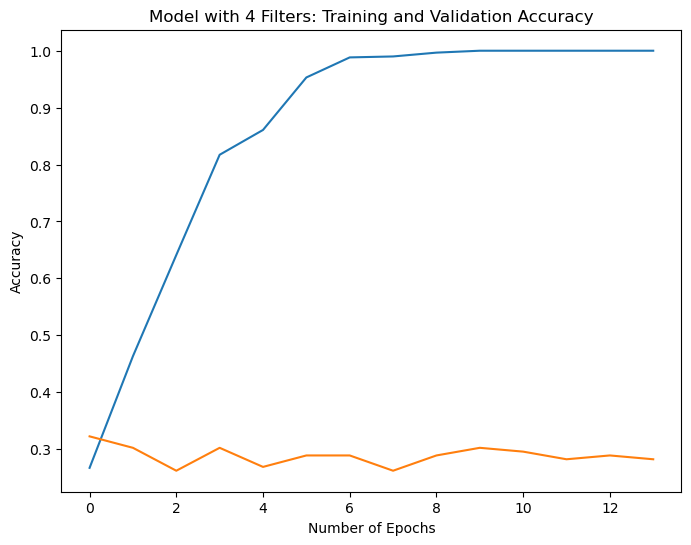

In [17]:
print("Model with 4 filters:")
classifier.train_and_plot(4)

Model with 8 filters:
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 126, 126, 8)       80        
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 63, 63, 8)         0         
 ng2D)                                                           
                                                                 
 flatten_11 (Flatten)        (None, 31752)             0         
                                                                 
 dense_22 (Dense)            (None, 16)                508048    
                                                                 
 dense_23 (Dense)            (None, 4)                 68        
                                                                 
Total params: 508196 (1.94 MB)
Trainable params: 508196 (1.94 MB)
Non-trainable params: 0 (0.00 B

2024-04-05 19:57:58.979581: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


38/38 [==============================] - 1s 17ms/step - loss: 36.4546 - accuracy: 0.2701 - val_loss: 1.3861 - val_accuracy: 0.2550
Epoch 2/20
38/38 [==============================] - 0s 13ms/step - loss: 1.3863 - accuracy: 0.2366 - val_loss: 1.3855 - val_accuracy: 0.2550
Epoch 3/20
38/38 [==============================] - 1s 14ms/step - loss: 1.3852 - accuracy: 0.2852 - val_loss: 1.3846 - val_accuracy: 0.3020
Epoch 4/20
38/38 [==============================] - 1s 15ms/step - loss: 1.3841 - accuracy: 0.3171 - val_loss: 1.3837 - val_accuracy: 0.3020
Epoch 5/20
38/38 [==============================] - 0s 13ms/step - loss: 1.3830 - accuracy: 0.3171 - val_loss: 1.3829 - val_accuracy: 0.3020
Epoch 6/20
38/38 [==============================] - 0s 13ms/step - loss: 1.3820 - accuracy: 0.3171 - val_loss: 1.3822 - val_accuracy: 0.3020
Epoch 7/20
38/38 [==============================] - 1s 13ms/step - loss: 1.3812 - accuracy: 0.3171 - val_loss: 1.3815 - val_accuracy: 0.3020
Epoch 8/20
38/38 [=====

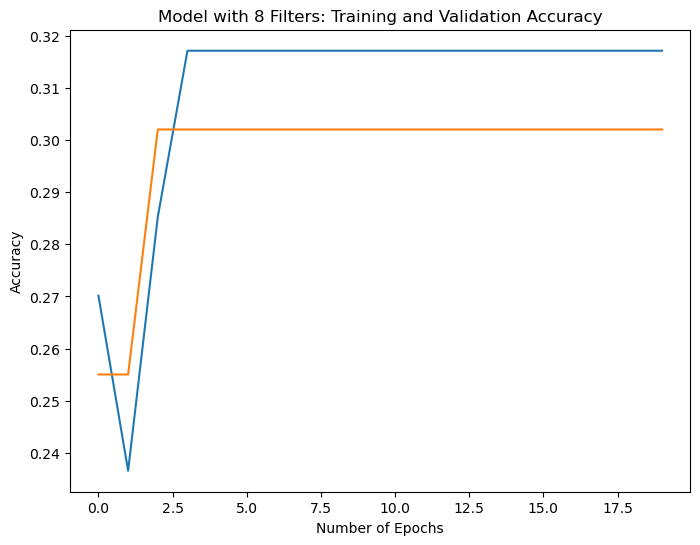

In [18]:
print("Model with 8 filters:")
classifier.train_and_plot(8)

Model with 16 filters:
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 16)      160       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 63, 63, 16)        0         
 ng2D)                                                           
                                                                 
 flatten_12 (Flatten)        (None, 63504)             0         
                                                                 
 dense_24 (Dense)            (None, 16)                1016080   
                                                                 
 dense_25 (Dense)            (None, 4)                 68        
                                                                 
Total params: 1016308 (3.88 MB)
Trainable params: 1016308 (3.88 MB)
Non-trainable params: 0 (0.0

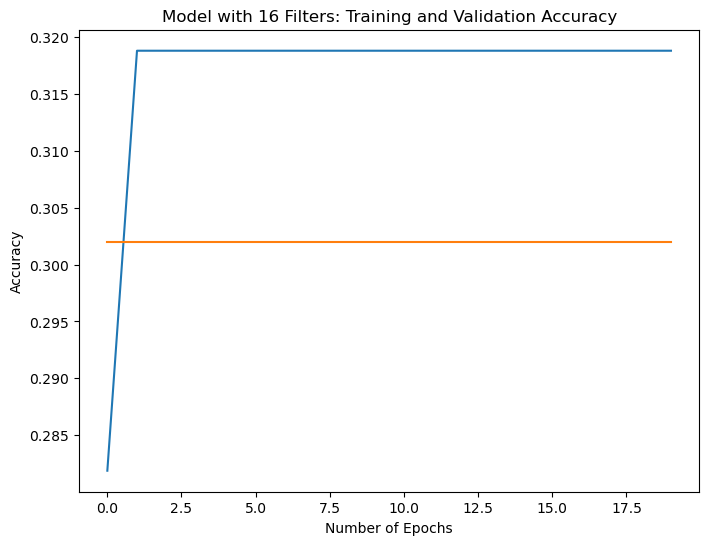

In [19]:
print("Model with 16 filters:")
classifier.train_and_plot(16)

# Model Comparisons and Observations

## Model with 4 Filters

### Observations:
- The model with 4 filters shows a significant difference between training and validation accuracy.
- Training accuracy quickly reaches close to 100%, indicating that the model has learned the training data well.
- However, the validation accuracy is much lower and does not improve much throughout the training process, suggesting that the model is not generalizing well to unseen data.

### Interpretation:
- This is a clear sign of overfitting, where the model has effectively memorized the training data but fails to perform on data it has not seen before.

## Model with 8 Filters

### Observations:
- The model with 8 filters has a more moderate training accuracy, which is closer to the validation accuracy.
- Both the training and validation accuracies are relatively low, with validation accuracy being slightly higher than training accuracy after the initial epochs.

### Interpretation:
- The model with 8 filters might be underfitting, as indicated by the overall low accuracy on both training and validation datasets.
- The closeness of training and validation accuracies suggests that the model is not learning enough from the data and may benefit from more complex features or additional training.

## Model with 16 Filters

### Observations:
- The model with 16 filters shows very close training and validation accuracies.
- Both accuracies are stable and plateau early in the training process.

### Interpretation:
- The model with 16 filters appears to be neither overfitting nor underfitting, as indicated by the close and stable accuracies.
- However, the accuracies are still low, which could suggest that the model capacity is not sufficient to capture the complexity of the data or that the features learned are not discriminative enough.

## General Conclusion
- Comparing the three models, it is evident that differences in the number of filters have a significant impact on the model's ability to learn and generalize.
- The model with 4 filters overfits, the model with 8 filters underfits, and the model with 16 filters shows a balance but with low accuracy, indicating that further refinement is needed.